# Importing the libraries
#importing the libraries to use in the Data Processing

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.python.client import device_lib 
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.preprocessing import image
from keras.layers import Dense
import tensorflow as tf
import numpy as np

Using TensorFlow backend.
/home/rodrigo/anaconda3/envs/cuda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rodrigo/anaconda3/envs/cuda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rodrigo/anaconda3/envs/cuda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rodrigo/anaconda3

# -Data Processing
#Preparing the images that will be used in the CNN

# Preprocessing the Training Set

In [2]:
train_datagen = ImageDataGenerator(validation_split = 0.3, rescale = 1./255,shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True, rotation_range = 20, width_shift_range = 0.2, height_shift_range = 0.2, fill_mode = 'nearest')

In [3]:
training_set = train_datagen.flow_from_directory("/home/rodrigo/Roit/Teste/teste_roit_corrigido/cachorro_gato_dataset/PetImages/", target_size = (64, 64), shuffle = True, class_mode = 'binary', batch_size = 32, subset = "training")

Found 17499 images belonging to 2 classes.


# Preprocessing the Test Set

In [4]:
test_datagen = ImageDataGenerator(validation_split = 0.3, rescale = 1./255)
test_set = test_datagen.flow_from_directory('/home/rodrigo/Roit/Teste/teste_roit_corrigido/cachorro_gato_dataset/PetImages/', target_size = (64, 64), batch_size = 32, class_mode = 'binary', subset = "validation")

Found 7498 images belonging to 2 classes.


# -Building the CNN
#Building the architecture of the CNN, adding the layers, pooling, adding the second cnn layer, flattening the results of all the cnn's and poolings into one dimensional vector, which will become the input of a fully conected neural network and finally conect all this to the final output layer.

# Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

# Convolutional Neural Network

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64, 64, 3]))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

# Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

# Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

# Full Conection

In [10]:
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

# Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# -Training the CNN
#Training the CNN on the Training Set and evaluating it on the Test Set.

# Compiling the CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode = 'min', verbose = 2, patience = 10)

In [14]:
my_callbacks = [es]

In [25]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 50, verbose = 1, callbacks = my_callbacks)

Epoch 1/50
449/547 [=======================>......] - ETA: 11s - loss: 0.3618 - acc: 0.8355

/home/rodrigo/anaconda3/envs/cuda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/home/rodrigo/anaconda3/envs/cuda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/home/rodrigo/anaconda3/envs/cuda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/home/rodrigo/anaconda3/envs/cuda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/home/rodrigo/anaconda3/envs/cuda/lib/python3.7/sit

547/547 [==============================] - 77s 140ms/step - loss: 0.3657 - acc: 0.8347 - val_loss: 0.3683 - val_acc: 0.8340
Epoch 2/50
547/547 [==============================] - 77s 142ms/step - loss: 0.3612 - acc: 0.8388 - val_loss: 0.3856 - val_acc: 0.8273
Epoch 3/50
547/547 [==============================] - 77s 141ms/step - loss: 0.3641 - acc: 0.8358 - val_loss: 0.3594 - val_acc: 0.8418
Epoch 4/50
547/547 [==============================] - 77s 141ms/step - loss: 0.3616 - acc: 0.8366 - val_loss: 0.3451 - val_acc: 0.8482
Epoch 5/50
547/547 [==============================] - 77s 141ms/step - loss: 0.3600 - acc: 0.8363 - val_loss: 0.3988 - val_acc: 0.8292
Epoch 6/50
547/547 [==============================] - 78s 142ms/step - loss: 0.3589 - acc: 0.8428 - val_loss: 0.3573 - val_acc: 0.8438
Epoch 7/50
547/547 [==============================] - 79s 144ms/step - loss: 0.3594 - acc: 0.8368 - val_loss: 0.3950 - val_acc: 0.8329
Epoch 8/50
547/547 [==============================] - 83s 152ms/st

# Saving the model
#Saving the model to use in the API.

In [26]:
from tensorflow.keras.models import load_model
cnn.save("/home/rodrigo/Roit/Teste/teste_roit_corrigido/model.h5")

# -Making a Single Prediction
#Making a single prediction to test the model in production, deploying the cnn on two different images (a cat and a dog) to see if the cnn can recognize them correctly.

In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

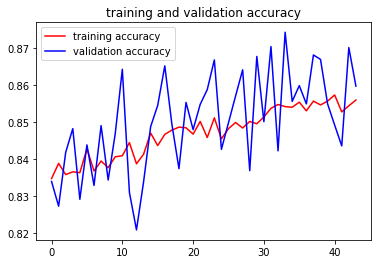

<Figure size 432x288 with 0 Axes>

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'validation accuracy')
plt.title('training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [59]:
test_image = image.load_img('/home/rodrigo/Roit/Teste/teste_roit_corrigido/predictions/dg8.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
score = result[0]
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

This image is 0.00 percent cat and 100.00 percent dog.


In [57]:
print(prediction)

dog


In [43]:
test_image2 = image.load_img('/home/rodrigo/Roit/Teste/teste_roit_corrigido/predictions/dg3.jpg', target_size = (64, 64))
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis = 0)
result = cnn.predict(test_image2)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [44]:
print(prediction)

dog


In [42]:
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

This image is 100.00 percent cat and 0.00 percent dog.
